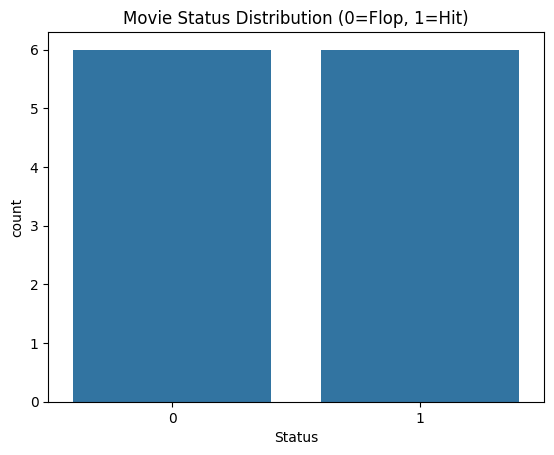

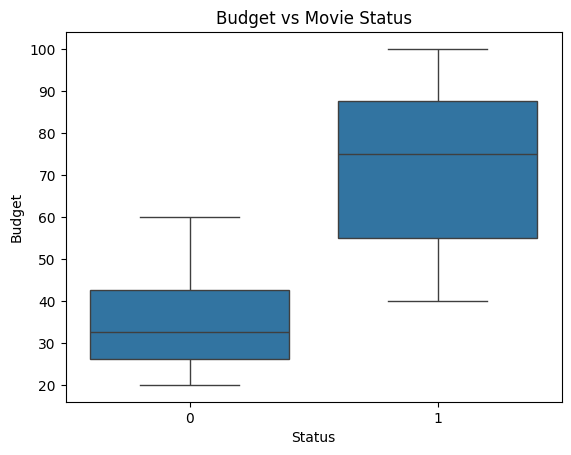

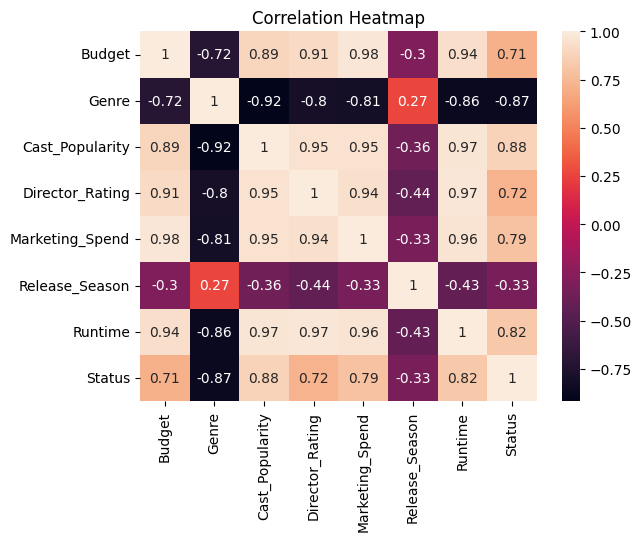

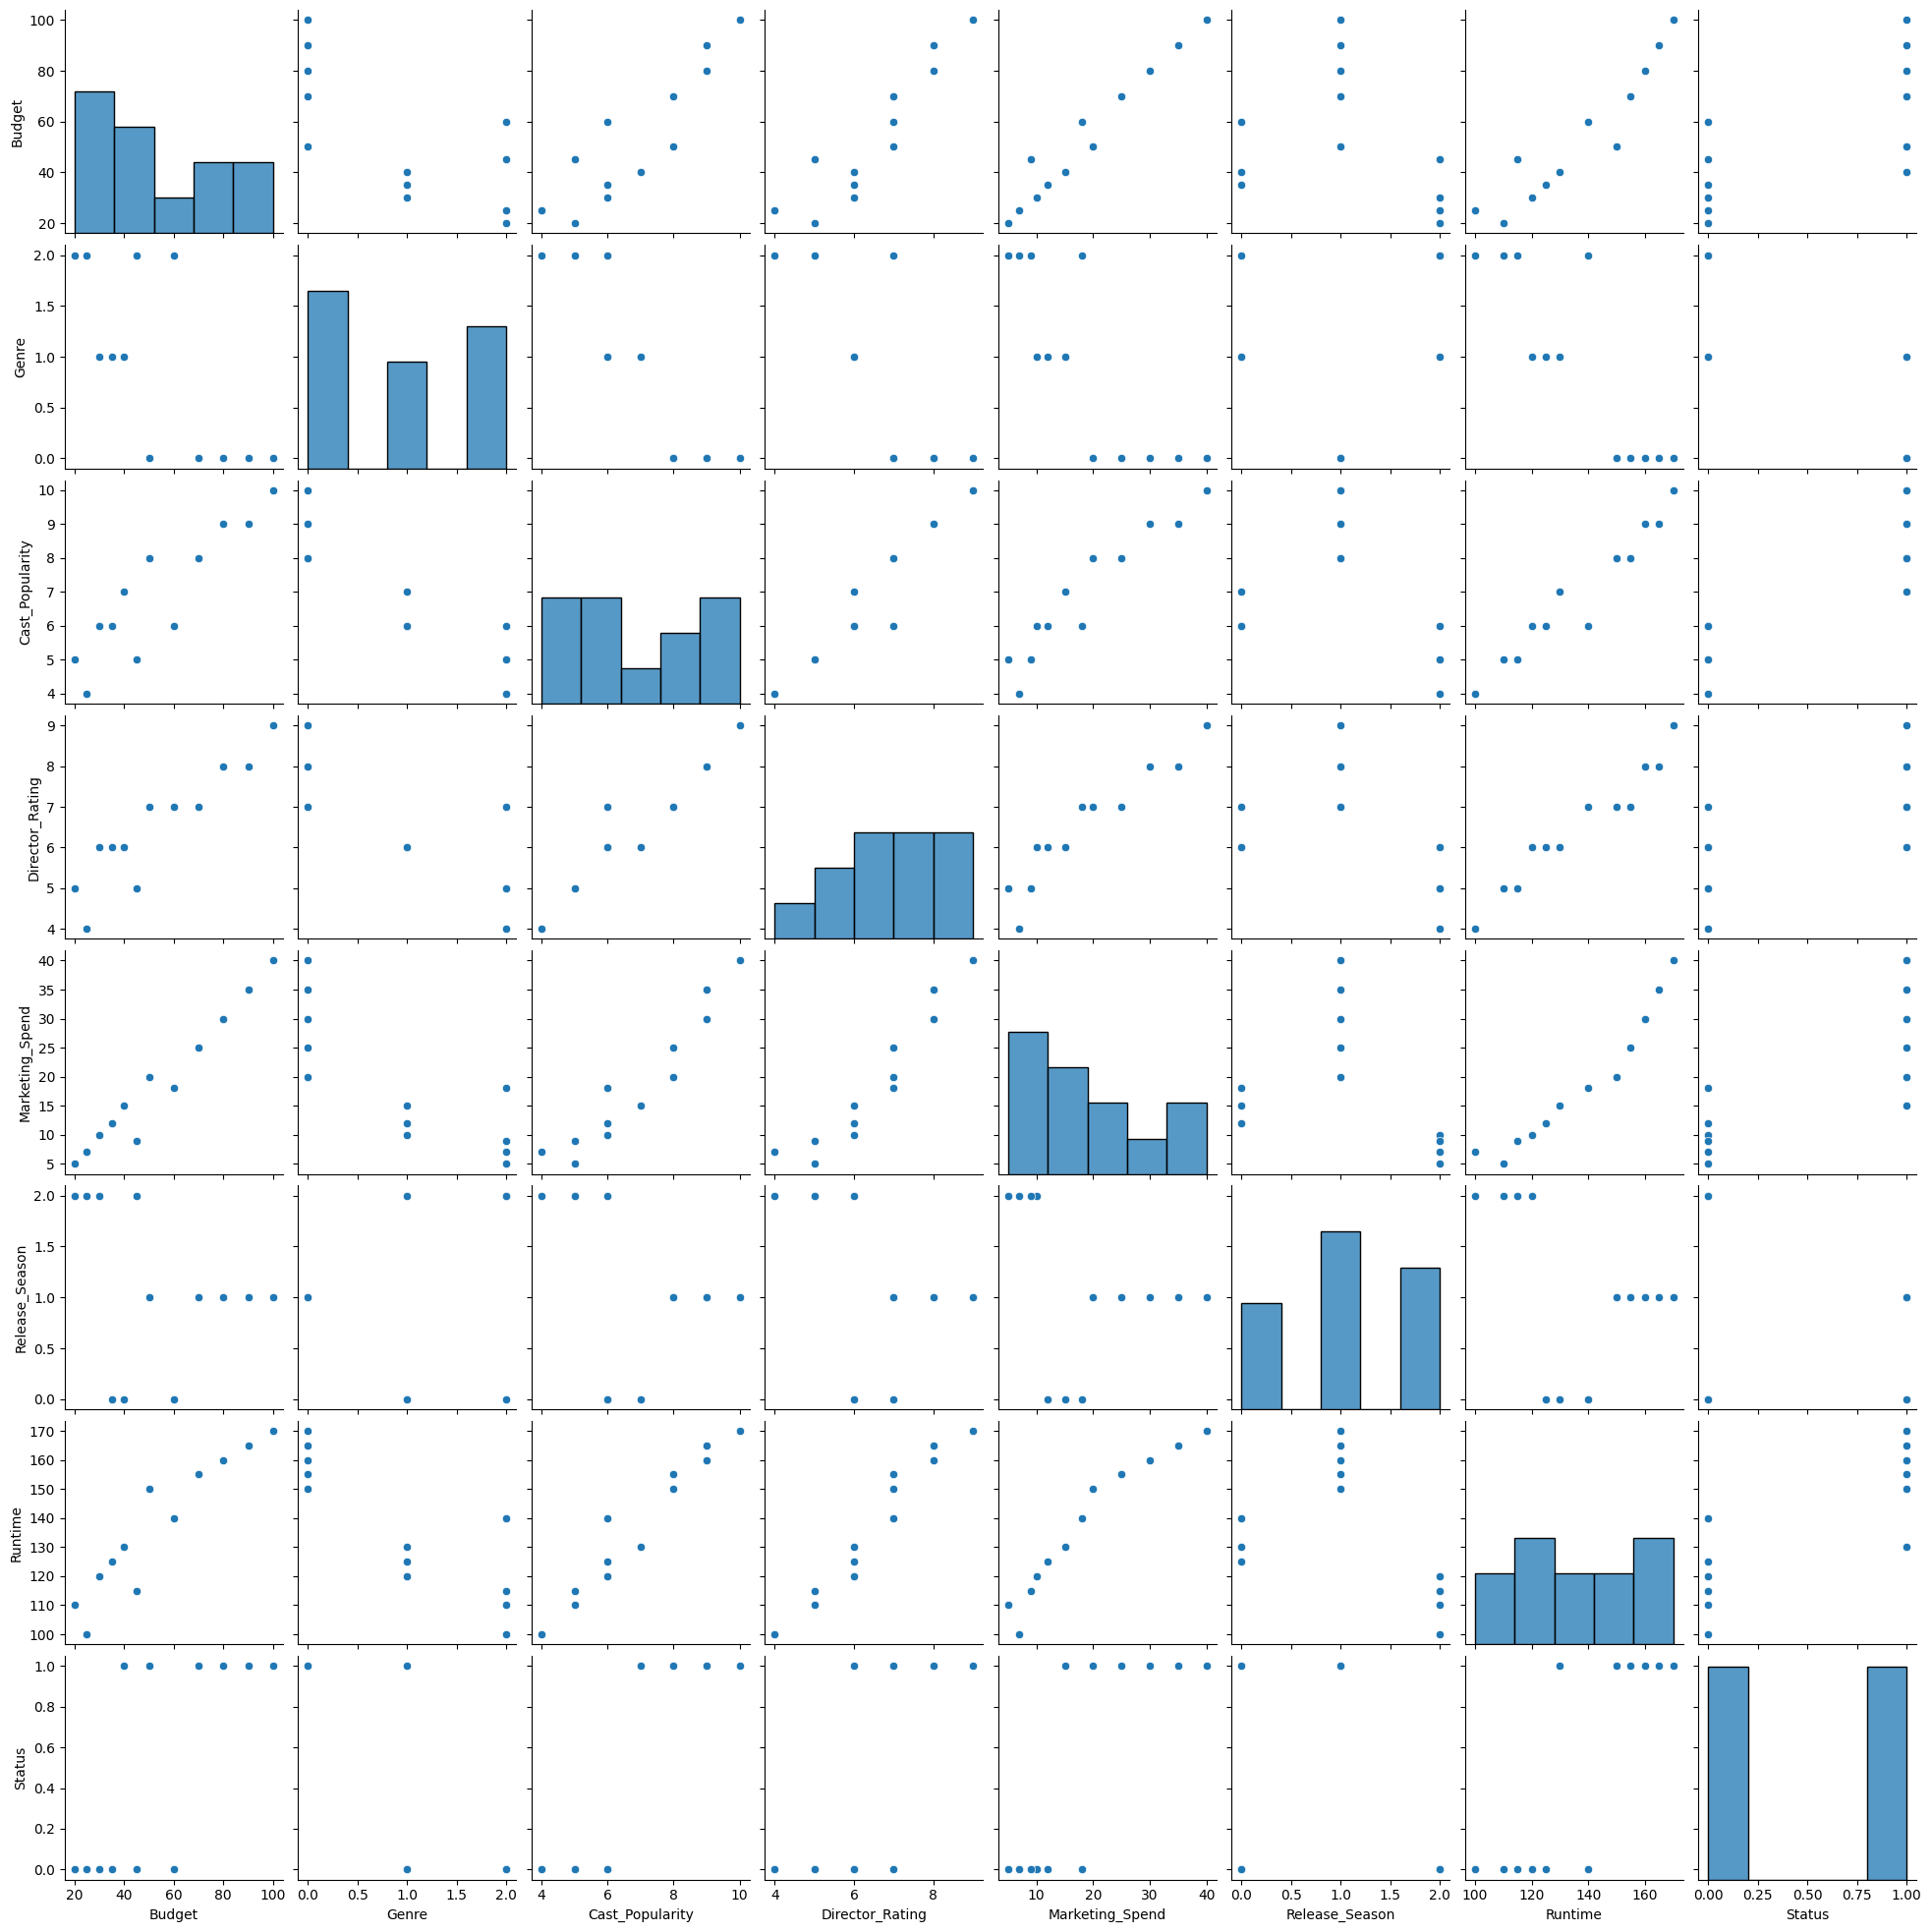

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Accuracy: 1.0

Decision Tree Accuracy: 1.0

Random Forest Accuracy: 1.0

SVM Accuracy: 0.5

Gradient Boosting Accuracy: 1.0


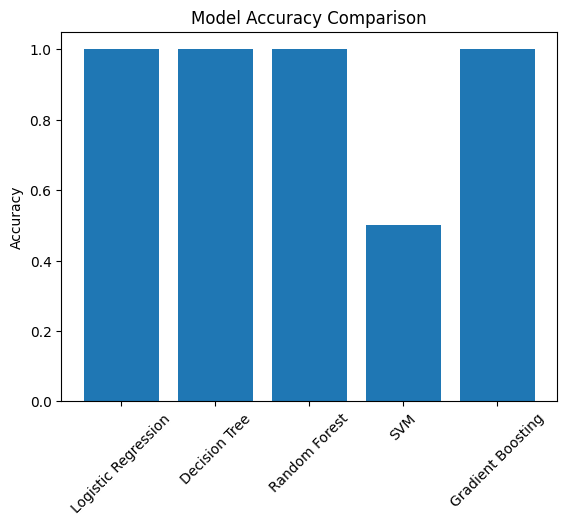

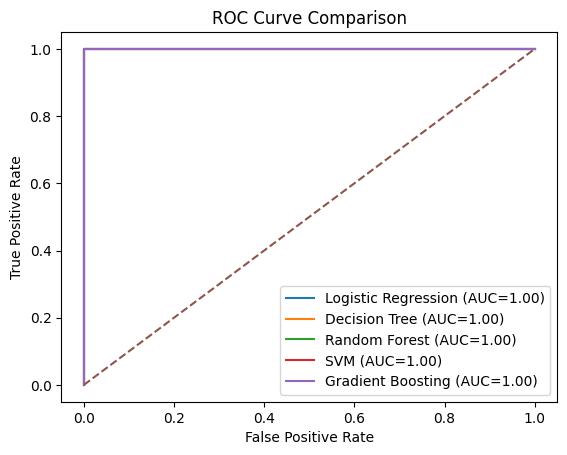


Best Model: Logistic Regression


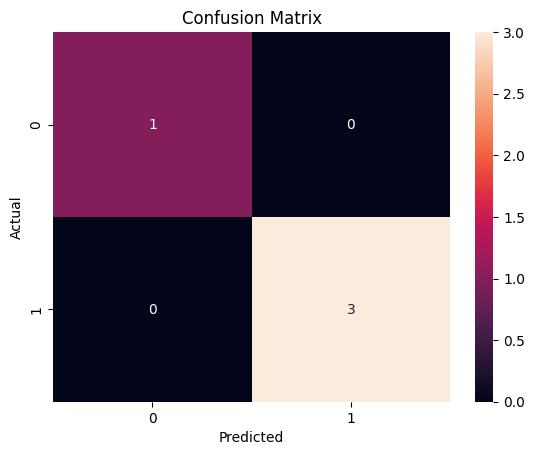


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         3

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
5 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback

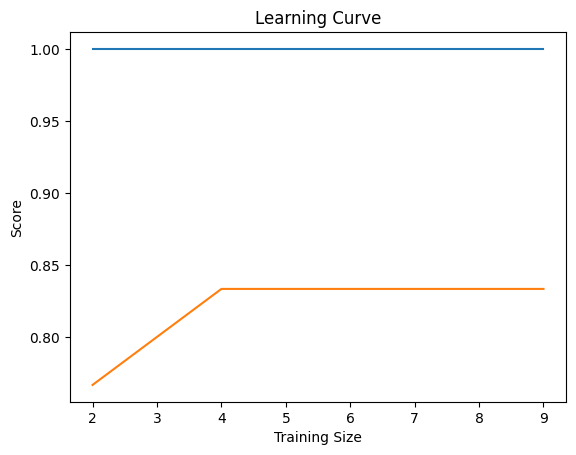

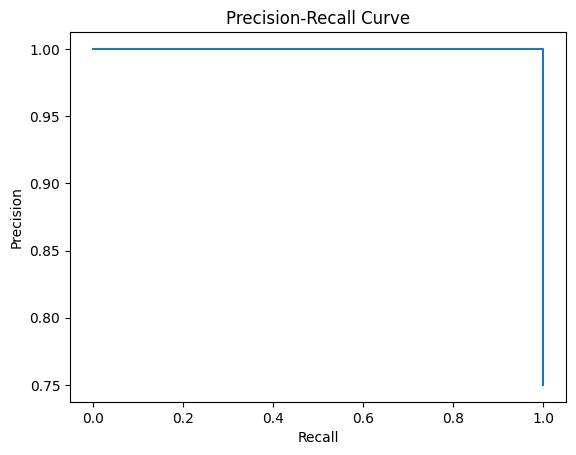


Model saved as best_movie_model.pkl


In [1]:
# ==========================================================
# 🎬 Movie Success Prediction – Complete Final Year Project
# ==========================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (accuracy_score, confusion_matrix,
                             classification_report, roc_curve, auc,
                             precision_recall_curve)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# ----------------------------------------------------------
# 1️⃣ Create Dataset
# ----------------------------------------------------------

data = {
    'Budget': [50, 30, 80, 20, 100, 40, 60, 25, 90, 35, 70, 45],
    'Genre': ['Action', 'Comedy', 'Action', 'Drama', 'Action',
              'Comedy', 'Drama', 'Drama', 'Action', 'Comedy',
              'Action', 'Drama'],
    'Cast_Popularity': [8, 6, 9, 5, 10, 7, 6, 4, 9, 6, 8, 5],
    'Director_Rating': [7, 6, 8, 5, 9, 6, 7, 4, 8, 6, 7, 5],
    'Marketing_Spend': [20, 10, 30, 5, 40, 15, 18, 7, 35, 12, 25, 9],
    'Release_Season': ['Summer', 'Winter', 'Summer', 'Winter', 'Summer',
                       'Festival', 'Festival', 'Winter', 'Summer', 'Festival',
                       'Summer', 'Winter'],
    'Runtime': [150, 120, 160, 110, 170, 130, 140, 100, 165, 125, 155, 115],
    'Status': ['Hit', 'Flop', 'Hit', 'Flop', 'Hit',
               'Hit', 'Flop', 'Flop', 'Hit', 'Flop',
               'Hit', 'Flop']
}

df = pd.DataFrame(data)

# ----------------------------------------------------------
# 2️⃣ Encoding
# ----------------------------------------------------------

le = LabelEncoder()
for col in ['Genre', 'Release_Season', 'Status']:
    df[col] = le.fit_transform(df[col])

# ----------------------------------------------------------
# 3️⃣ Attractive Visualizations
# ----------------------------------------------------------

# Count Plot
plt.figure()
sns.countplot(x=df['Status'])
plt.title("Movie Status Distribution (0=Flop, 1=Hit)")
plt.show()

# Box Plot
plt.figure()
sns.boxplot(x=df['Status'], y=df['Budget'])
plt.title("Budget vs Movie Status")
plt.show()

# Correlation Heatmap
plt.figure()
sns.heatmap(df.corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()

# Pair Plot
sns.pairplot(df)
plt.show()

# ----------------------------------------------------------
# 4️⃣ Train-Test Split
# ----------------------------------------------------------

X = df.drop('Status', axis=1)
y = df['Status']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

# ----------------------------------------------------------
# 5️⃣ Train Multiple Models
# ----------------------------------------------------------

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC(probability=True),
    "Gradient Boosting": GradientBoostingClassifier()
}

accuracies = {}
roc_data = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies[name] = acc

    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    roc_data[name] = (fpr, tpr, roc_auc)

    print(f"\n{name} Accuracy:", acc)

# ----------------------------------------------------------
# 6️⃣ Accuracy Comparison Graph
# ----------------------------------------------------------

plt.figure()
plt.bar(accuracies.keys(), accuracies.values())
plt.xticks(rotation=45)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()

# ----------------------------------------------------------
# 7️⃣ ROC Curve
# ----------------------------------------------------------

plt.figure()
for name, (fpr, tpr, roc_auc) in roc_data.items():
    plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc:.2f})")

plt.plot([0,1],[0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

# ----------------------------------------------------------
# 8️⃣ Select Best Model
# ----------------------------------------------------------

best_model_name = max(accuracies, key=accuracies.get)
best_model = models[best_model_name]

print("\nBest Model:", best_model_name)

# ----------------------------------------------------------
# 9️⃣ Confusion Matrix
# ----------------------------------------------------------

y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# ----------------------------------------------------------
# 🔟 Feature Importance (if available)
# ----------------------------------------------------------

if hasattr(best_model, "feature_importances_"):
    plt.figure()
    plt.barh(X.columns, best_model.feature_importances_)
    plt.title("Feature Importance")
    plt.show()

# ----------------------------------------------------------
# 1️⃣1️⃣ Learning Curve
# ----------------------------------------------------------

train_sizes, train_scores, test_scores = learning_curve(
    best_model, X, y, cv=5)

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1))
plt.plot(train_sizes, np.mean(test_scores, axis=1))
plt.title("Learning Curve")
plt.xlabel("Training Size")
plt.ylabel("Score")
plt.show()

# ----------------------------------------------------------
# 1️⃣2️⃣ Precision-Recall Curve
# ----------------------------------------------------------

y_prob = best_model.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_prob)

plt.figure()
plt.plot(recall, precision)
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

# ----------------------------------------------------------
# 1️⃣3️⃣ Save Best Model
# ----------------------------------------------------------

joblib.dump(best_model, "best_movie_model.pkl")
print("\nModel saved as best_movie_model.pkl")